In [1]:
import os
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot
import matplotlib.pyplot as plt 
# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

# library written for this exercise providing additional functions for assignment submission, and others
import utils

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## Data

The data does not need to be scaled looking at the range

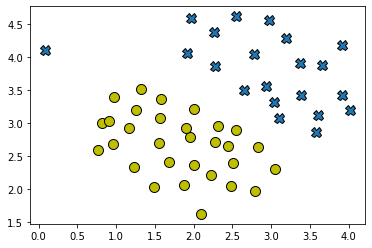

In [2]:
# Load from ex6data1
# You will have X, y as keys in the dict data
data = loadmat(os.path.join('Data', 'ex6data1.mat'))
X, y = data['X'], data['y'][:, 0]

# Plot training data
utils.plotData(X, y)

## Support Vector Machines

<img src="svm.png" alt="Cost function" width="500" height="600">


### Linear Kernerls

Large C == Overfitting and otherwise

In [3]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear', C = 1)
svm_linear.fit(X, np.ravel(y))

## C = 10
svm_linear_10 = SVC(kernel='linear', C = 10)
svm_linear_10.fit(X, np.ravel(y))

## C = 100
svm_linear_100 = SVC(kernel='linear', C = 100)
svm_linear_100.fit(X, np.ravel(y))


## C = 1000
svm_linear_1000 = SVC(kernel='linear', C = 1000)
svm_linear_1000.fit(X, np.ravel(y))

SVC(C=1000, kernel='linear')

(1.5, 5.0)

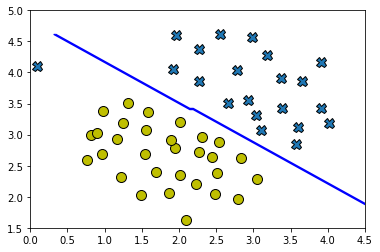

In [4]:
utils.plotData(X, y)

# plotting the decision boundary
X_1,X_2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
plt.contour(X_1,X_2,svm_linear.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="b")
plt.xlim(0,4.5)
plt.ylim(1.5,5)

#### visualizeBoundary

In [5]:
def visualizeBoundary(X, y, model):
    """
    Plots a non-linear decision boundary learned by the SVM and overlays the data on it.

    Parameters
    ----------
    X : array_like
        (m x 2) The training data with two features (to plot in a 2-D plane).

    y : array_like
        (m, ) The data labels.

    model : the svm model used
        
    """
    utils.plotData(X, y)

    # make classification predictions over a grid of values
    x1plot = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    x2plot = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
    X1, X2 = np.meshgrid(x1plot, x2plot)

    vals = np.zeros(X1.shape)
    for i in range(X1.shape[1]):
        this_X = np.stack((X1[:, i], X2[:, i]), axis=1)
        vals[:, i] = model.predict(this_X)

    plt.contour(X1, X2, vals, colors='y', linewidths=2)
    plt.pcolormesh(X1, X2, vals, cmap='YlGnBu', alpha=0.25, edgecolors='None', lw=0, shading='auto')
    plt.grid(False)

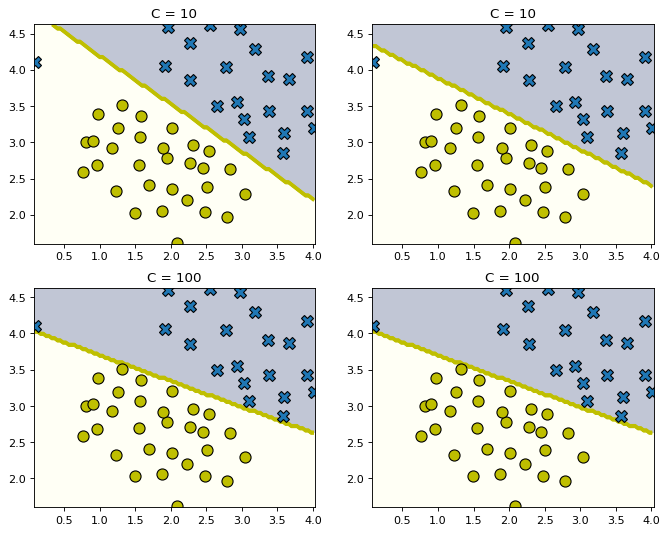

In [6]:
plt.figure(figsize=(10, 8), dpi=80)

plt.subplot(2, 2, 1)
visualizeBoundary(X, y, svm_linear)
plt.title('C = 10')

plt.subplot(2, 2, 2)
visualizeBoundary(X, y, svm_linear_10)
plt.title('C = 10')

plt.subplot(2, 2, 3)
visualizeBoundary(X, y, svm_linear_100)
plt.title('C = 100')

plt.subplot(2, 2, 4)
visualizeBoundary(X, y, svm_linear_1000)
plt.title('C = 100')

plt.show()

<a id="section1"></a>
###  SVM with Gaussian Kernels (rbf)


The Gaussian kernel is also parameterized by a bandwidth parameter, $\sigma$, which determines how fast the similarity metric decreases (to 0) as the examples are further apart.
The Gaussian kernel function is defined as:

$$f_{\text{similarity}} = K_{\text{gaussian}} \left( x^{(i)}, x^{(j)} \right) = \exp \left( - \frac{\left\lvert\left\lvert x^{(i)} - x^{(j)}\right\lvert\right\lvert^2}{2\sigma^2} \right) = \exp \left( -\frac{\sum_{k=1}^n \left( x_k^{(i)} - x_k^{(j)}\right)^2}{2\sigma^2} \right)$$
<a id="gaussianKernel"></a>

<img src="gauss.png" alt="Cost function" width="500" height="600">


This data is not linearly seperable, so we use gaussian kernel which can do a pretty good job without creating polynomial features

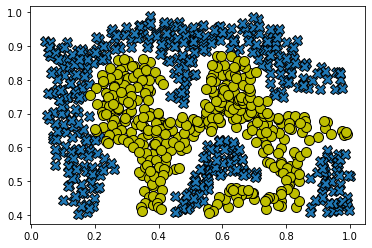

In [7]:
# Load from ex6data2
# You will have X, y as keys in the dict data
data = loadmat(os.path.join('Data', 'ex6data2.mat'))
X, y = data['X'], data['y'][:, 0]

# Plot training data
utils.plotData(X, y)

**large gamma == overfitting**

In [14]:
svm_rbf_1 = SVC(kernel='rbf', gamma=1)
svm_rbf_1.fit(X, np.ravel(y))

svm_rbf_10 = SVC(kernel='rbf', gamma=10)
svm_rbf_10.fit(X, np.ravel(y))

svm_rbf30 = SVC(kernel='rbf', gamma=30)
svm_rbf30.fit(X, np.ravel(y))

svm_rbf_1000 = SVC(kernel='rbf', gamma=1000)
svm_rbf_1000.fit(X, np.ravel(y))

SVC(gamma=1000)

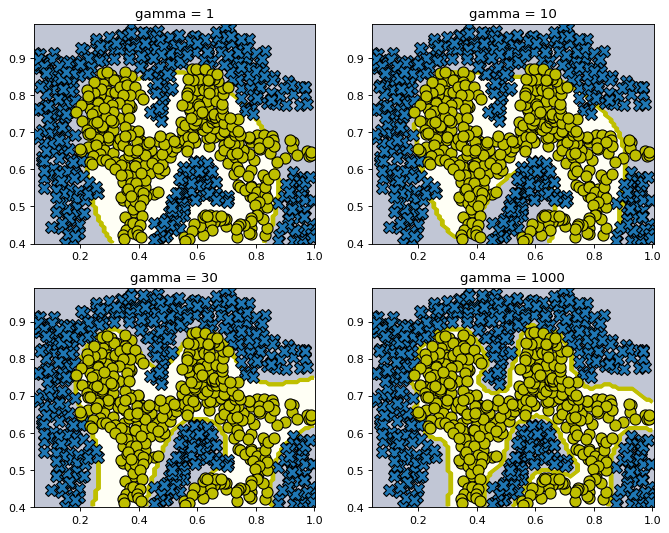

In [15]:
plt.figure(figsize=(10, 8), dpi=80)

plt.subplot(2, 2, 1)
visualizeBoundary(X, y, svm_rbf_1)
plt.title('gamma = 1')


plt.subplot(2, 2, 2)
visualizeBoundary(X, y, svm_rbf_10)
plt.title('gamma = 10')


plt.subplot(2, 2, 3)
visualizeBoundary(X, y, svm_rbf30)
plt.title('gamma = 30')


plt.subplot(2, 2, 4)
visualizeBoundary(X, y, svm_rbf_1000)
plt.title('gamma = 1000')

plt.show()

### Spam Classification 

In [103]:
def processEmail(email_contents, verbose=True):

    # Load Vocabulary
    vocabList = utils.getVocabList()

    # Init return value
    word_indices = []

    # ========================== Preprocess Email ===========================
    # Find the Headers ( \n\n and remove )
    # Uncomment the following lines if you are working with raw emails with the
    # full headers
    # hdrstart = email_contents.find(chr(10) + chr(10))
    # email_contents = email_contents[hdrstart:]

    # Lower case
    email_contents = email_contents.lower()
    
    # Strip all HTML
    # Looks for any expression that starts with < and ends with > and replace
    # and does not have any < or > in the tag it with a space
    email_contents =re.compile('<[^<>]+>').sub(' ', email_contents)

    # Handle Numbers
    # Look for one or more characters between 0-9
    email_contents = re.compile('[0-9]+').sub(' number ', email_contents)

    # Handle URLS
    # Look for strings starting with http:// or https://
    email_contents = re.compile('(http|https)://[^\s]*').sub(' httpaddr ', email_contents)

    # Handle Email Addresses
    # Look for strings with @ in the middle
    email_contents = re.compile('[^\s]+@[^\s]+').sub(' emailaddr ', email_contents)
    
    # Handle $ sign
    email_contents = re.compile('[$]+').sub(' dollar ', email_contents)
    
    # get rid of any punctuation
    email_contents = re.split('[ @$/#.-:&*+=\[\]?!(){},''">_<;%\n\r]', email_contents)

    # remove any empty word string
    email_contents = [word for word in email_contents if len(word) > 0]
    
    # Stem the email contents word by word
    stemmer = utils.PorterStemmer()
    processed_email = []
    for word in email_contents:
        # Remove any remaining non alphanumeric characters in word
        word = re.compile('[^a-zA-Z0-9]').sub('', word).strip()
        word = stemmer.stem(word)
        processed_email.append(word)

        if len(word) < 1:
            continue

        # Look up the word in the dictionary and add to word_indices if found
        try:
            word_indices.append(vocabList.index(word))
        except ValueError:
            pass

    # =============================================================
    # Total number of words in the dictionary
    n = 1899

    # You need to return the following variables correctly.
    features = np.zeros(n)

    # ===================== YOUR CODE HERE ======================
    for i in range(1, n + 1):
        if i in word_indices:
            features[i] = 1

    if verbose:
        print('----------------')
        print('Processed email:')
        print('----------------')
        print(' '.join(processed_email))
    return word_indices, features

**Imblanced Data**

In [109]:
# Extract Features
with open(os.path.join('Data', 'emailSample1.txt')) as fid:
    file_contents = fid.read()

word_indices, features  = processEmail(file_contents)

#Print Stats
print('-------------')
print('Word Indices:')
print('-------------')
print(word_indices)
print('-------------')
print('Word features:')
print('-------------')
print('Number of non-zero entries: %d' % sum(features > 0))
print(features)

----------------
Processed email:
----------------
anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollar number you should checkout httpaddr or perhap amazon ec number if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr
-------------
Word Indices:
-------------
[85, 915, 793, 1076, 882, 369, 1698, 789, 1821, 1830, 882, 430, 1170, 793, 1001, 1894, 591, 1675, 237, 161, 88, 687, 944, 1662, 1119, 1061, 1698, 374, 1161, 476, 1119, 1892, 1509, 798, 1181, 1236, 511, 1119, 809, 1894, 1439, 1546, 180, 1698, 1757, 1895, 687, 1675, 991, 960, 1476, 70, 529, 1698, 530]
-------------
Word features:
-------------
Number of non-zero entries: 45
[0. 0. 0. ... 0. 0. 0.]


#### Train 

In [132]:
# Load the Spam Email dataset
# You will have X, y in your environment
data = loadmat(os.path.join('Data', 'spamTrain.mat'))
X, y= data['X'].astype(float), data['y'][:, 0]

X.shape

(4000, 1899)

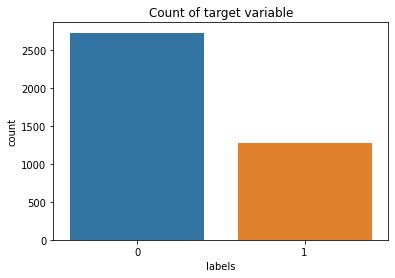

In [127]:
import seaborn as sns
sns.countplot(x = y)
plt.title('Count of target variable')
plt.xlabel('labels')
plt.show()

use svm when the number of training examples and features are not fairly large

In [137]:
print('Training Linear SVM (Spam Classification)')
print('This may take 1 to 2 minutes ...\n')

c = .1
svm_spam_linear = SVC(kernel='linear', C = c)
svm_spam_linear.fit(X, np.ravel(y))

print('done')

Training Linear SVM (Spam Classification)
This may take 1 to 2 minutes ...

done


In [138]:
print('Train Accuracy: %.3f'% svm_spam_linear.score(X, y))

Train Accuracy: 0.998


In [139]:
# Load the test dataset
# You will have Xtest, ytest in your environment
data = loadmat(os.path.join('Data', 'spamTest.mat'))
Xtest, ytest = data['Xtest'].astype(float), data['ytest'][:, 0]

print('Evaluating the trained Linear SVM on a test set ...')

print('Test Accuracy: %.3f'% svm_spam_linear.score(Xtest, ytest))

Evaluating the trained Linear SVM on a test set ...
Test Accuracy: 0.989


#### Top predictors

In [152]:
# Sort the weights and obtin the vocabulary list
# NOTE some words have the same weights, 
# so their order might be different than in the text above
idx = np.argsort(svm_spam_linear.coef_[0])
top_idx = idx[-15:][::-1]
vocabList = utils.getVocabList()

print('Top predictors of spam:')
print('%-15s %-15s' % ('word', 'weight'))
print('----' + ' '*12 + '------')
for word, w in zip(np.array(vocabList)[top_idx], svm_spam_linear.coef_[0][top_idx]):
    print('%-15s %0.2f' % (word, w))


Top predictors of spam:
word            weight         
----            ------
our             0.50
click           0.47
remov           0.42
guarante        0.38
visit           0.37
basenumb        0.35
dollar          0.32
will            0.27
price           0.27
pleas           0.26
most            0.26
nbsp            0.25
lo              0.25
ga              0.25
hour            0.25
